In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [53]:
import csv
import os
import pandas_profiling
import pandas as pd
from itertools import islice

# use pandas-profiling to visualize our data
print(os.getcwd())
# print(os.listdir('/content/gdrive/My Drive/DataCompetition'))
data = pd.read_csv('cleanData_for_FiveClass.csv')
print(data.head())
print(data.info())

/Users/brayden/course/cs670/dataCompetition
   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM   Route  \
0  2018        3      8            26            7      YX    6058  3457.0   
1  2018        1      3            31            6      EV    5433   251.0   
2  2018        4     10            18            4      AA    1839  1451.0   
3  2019        1      1            21            1      MQ    3886  4631.0   
4  2019        2      6            13            4      OO    3070  5518.0   

  ORIGIN DEST  ...    fare  carrier_lg  large_ms  fare_lg  HUBS  \
0    LGA  BOS  ...  188.60          DL    0.2967   203.39     0   
1    ATL  MLI  ...  270.74          DL    0.9413   270.81     0   
2    DCA  DFW  ...  232.82          AA    0.5373   266.04     1   
3    ORD  MQT  ...  238.89          AA    0.9167   238.78     0   
4    SAF  PHX  ...  149.01          AA    0.9823   149.42     0   

   ARR_DELAY_GROUP  DISTANCE_CAT  ORIGIN_STATE AVG_FARE_MILE  TIME24  
0            

In [61]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import numpy as np

# normalized input
baseline_inputXs = ['MONTH','DAY_OF_WEEK','CARRIER', 'ORIGIN', 'DEST', 'ORIGIN_STATE', 'DEST_STATE',
         'CRS_DEP_TIME', 'DISTANCE', 'fare', 'large_ms', 
         'carrier_lg',    'HUBS', 'AVG_FARE_MILE', 'TIME24']
# DISTANCE_CAT single one value

#baseline
category_tag = ['ORIGIN', 'DEST',  'ORIGIN_STATE',  'DEST_STATE', 'carrier_lg']
baseline_input = data[baseline_inputXs].copy()

# One-Hot process for category data
lb = LabelEncoder()
for each_cag in category_tag:
    baseline_input[each_cag] = lb.fit_transform(baseline_input[each_cag])
#     lb.classes_ = np.char.add(lb.classes_ , '_' + each_cag)
#     lb_results_df = pd.DataFrame(lb_results, columns = lb.classes_)
#     baseline_input = pd.concat([baseline_input, lb_results_df], axis = 1)
#     baseline_input = baseline_input.drop(columns = each_cag)

lb_binary = LabelBinarizer()
lb_results = lb_binary.fit_transform(baseline_input['CARRIER'])
lb_results_of = pd.DataFrame(lb_results, columns = lb_binary.classes_)
baseline_input = pd.concat([baseline_input, lb_results_df], axis = 1)
baseline_input = baseline_input.drop(columns = 'CARRIER')


print(baseline_input.columns)
# print(baseline_input.head())


norm_tag = ['MONTH', 'DAY_OF_WEEK', 'ORIGIN_STATE', 'DEST_STATE',
       'CRS_DEP_TIME', 'DISTANCE', 'fare', 'large_ms', 'carrier_lg', 'HUBS',
       'AVG_FARE_MILE', 'TIME24', 'AA_carrier_lg', 'AS_carrier_lg',
       'B6_carrier_lg', 'DL_carrier_lg', 'F9_carrier_lg', 'G4_carrier_lg',
       'NK_carrier_lg', 'SY_carrier_lg', 'UA_carrier_lg', 'WN_carrier_lg']

d1_tag = ['MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 
       'CRS_DEP_TIME', 'DISTANCE', 'fare', 'large_ms', 'carrier_lg', 'HUBS',
       'AVG_FARE_MILE', 'TIME24', 'AA_carrier_lg', 'AS_carrier_lg',
       'B6_carrier_lg', 'DL_carrier_lg', 'F9_carrier_lg', 'G4_carrier_lg',
       'NK_carrier_lg', 'SY_carrier_lg', 'UA_carrier_lg', 'WN_carrier_lg']

d2_tag = ['MONTH', 'DAY_OF_WEEK', 'ORIGIN_STATE', 'DEST_STATE',
       'CRS_DEP_TIME', 'DISTANCE', 'fare', 'large_ms', 'carrier_lg', 'HUBS',
       'AVG_FARE_MILE', 'TIME24']

# norm_input
norm_input = baseline_input[norm_tag].copy()
# for each_tag in norm_input.columns:
#     if 'ORIGIN' or 'DEST' in each_tag:
#         if 'ORIGIN_STATE' or 'DEST_STATE' not in each_tag:
#             norm_input = norm_input.drop(columns = each_tag)
            
print(norm_input.columns)
# print(norm_input.head())

# drop state
no_state_input = baseline_input[d1_tag].copy()
# for each_tag in no_state_input.columns:
#     if 'STATE' in each_tag:
#         no_state_input = no_state_input.drop(columns = each_tag)
        
print(no_state_input.columns)
# print(no_state_input.head())

# drop carrier
no_carrier_input = norm_input[d2_tag].copy()
# for each_tag in no_carrier_input.columns:
#     if '_carrier_lg' in each_tag:
#         no_carrier_input = no_carrier_input.drop(columns = each_tag)
        
print(no_carrier_input.columns)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'ORIGIN_STATE', 'DEST_STATE',
       'CRS_DEP_TIME', 'DISTANCE', 'fare', 'large_ms', 'carrier_lg', 'HUBS',
       'AVG_FARE_MILE', 'TIME24', 'AA_carrier_lg', 'AS_carrier_lg',
       'B6_carrier_lg', 'DL_carrier_lg', 'F9_carrier_lg', 'G4_carrier_lg',
       'NK_carrier_lg', 'SY_carrier_lg', 'UA_carrier_lg', 'WN_carrier_lg'],
      dtype='object')
Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_STATE', 'DEST_STATE', 'CRS_DEP_TIME',
       'DISTANCE', 'fare', 'large_ms', 'carrier_lg', 'HUBS', 'AVG_FARE_MILE',
       'TIME24', 'AA_carrier_lg', 'AS_carrier_lg', 'B6_carrier_lg',
       'DL_carrier_lg', 'F9_carrier_lg', 'G4_carrier_lg', 'NK_carrier_lg',
       'SY_carrier_lg', 'UA_carrier_lg', 'WN_carrier_lg'],
      dtype='object')
Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DISTANCE',
       'fare', 'large_ms', 'carrier_lg', 'HUBS', 'AVG_FARE_MILE', 'TIME24',
       'AA_carrier_lg', 'AS_carrier_lg', 'B6_carrier_lg', 'DL_carrier_l

In [62]:

# Scaling for continuous features

continuous_tag = ['MONTH','DAY_OF_WEEK',
         'CRS_DEP_TIME', 'DISTANCE', 'fare', 'large_ms', 
              'AVG_FARE_MILE', 'TIME24']

scaler = StandardScaler()
scaler.fit(norm_input[continuous_tag])
norm_input[continuous_tag] = scaler.transform(norm_input[continuous_tag])
print(norm_input.head())

scaler.fit(no_state_input[continuous_tag])
no_state_input[continuous_tag] = scaler.transform(no_state_input[continuous_tag])
print(no_state_input.head())

scaler.fit(no_carrier_input[continuous_tag])
no_carrier_input[continuous_tag] = scaler.transform(no_carrier_input[continuous_tag])



      MONTH  DAY_OF_WEEK  ORIGIN_STATE  DEST_STATE  CRS_DEP_TIME  DISTANCE  \
0  0.733851     1.542969            31          15     -0.335845 -1.142090   
1 -0.801079     1.040125             8          10      0.472146 -0.261327   
2  1.347823     0.034438            41          38     -1.366375  0.835213   
3 -1.415051    -1.474093            11          18      0.965158 -0.908658   
4  0.119879     0.034438            29           2      1.040479 -0.777231   

       fare  large_ms  carrier_lg  HUBS  ...  AA_carrier_lg  AS_carrier_lg  \
0 -0.520668 -1.607097           3     0  ...              0              0   
1  0.986769  1.452403           3     0  ...              0              0   
2  0.290859 -0.465124           0     1  ...              1              0   
3  0.402256  1.335643           0     0  ...              1              0   
4 -1.247225  1.647004           0     0  ...              1              0   

   B6_carrier_lg  DL_carrier_lg  F9_carrier_lg  G4_carrier_lg 

[ 0  3  6  9 12]
training: baseline
Training set score: 0.671120
Training set loss: 0.945569
training: norm
Training set score: 0.671120
Training set loss: 0.940597
training: no_state
Training set score: 0.671120
Training set loss: 0.945135
training: no_carrier
Training set score: 0.671120
Training set loss: 0.941033


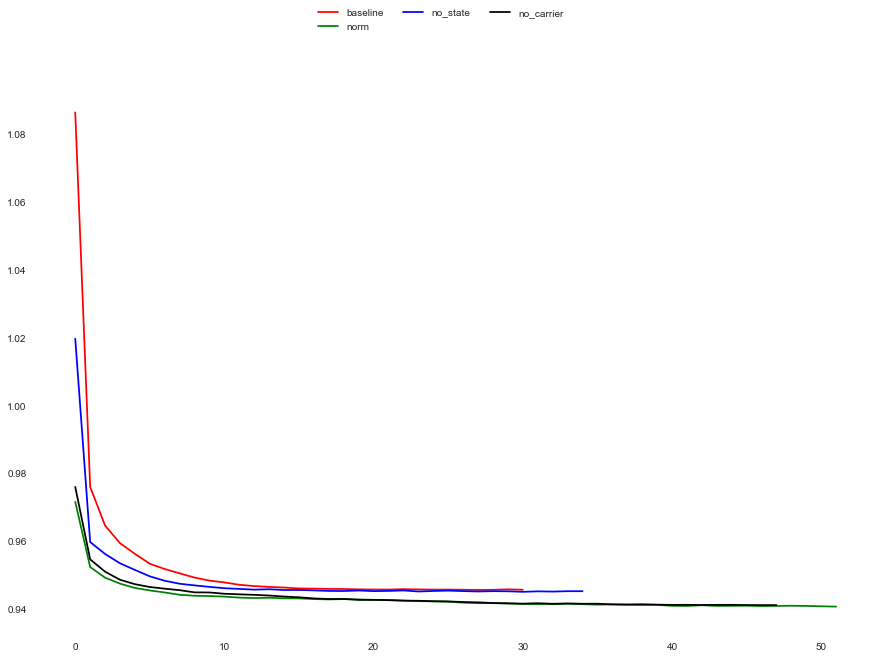

In [67]:
# train the model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

import warnings

Ydata = data['ARR_DELAY_GROUP']
Ydata = Ydata[0 : 400000].to_numpy()
for i in range(0, 13, 3):
    Ydata = np.where(Ydata == i - 1 , i, Ydata)
    Ydata = np.where(Ydata == i - 2, i, Ydata)
print(np.unique(Ydata))


# norm_kf = KFold(n_splits = 3)
# norm_clf = MLPClassifier(solver='adam', alpha = 0.01, hidden_layer_sizes=( 100, 3),  random_state=1, max_iter = 200)
# for train_indices, test_indices in norm_kf.split(norm_X):
#     norm_clf.fit(norm_X[train_indices], Ydata[train_indices])
#     print(norm_clf.score(norm_X[test_indices], Ydata[test_indices]))
#     print(norm_clf.loss_)

# plt.plot(norm_clf.loss_curve_)

baseline_X = baseline_input[0 : 400000].to_numpy()
norm_X = norm_input[0 : 400000].to_numpy()
no_state_X = no_state_input[0 : 400000].to_numpy()
no_carrier_X = no_carrier_input[0 : 400000].to_numpy()

labels = ["baseline", "norm", "no_state", "no_carrier"]
plot_args = [{'c': 'red'}, {'c': 'green'}, {'c': 'blue'}, {'c': 'black'}]
data_inputs = [baseline_X, norm_X, no_state_X, no_carrier_X]
Ydata_set = [Ydata, Ydata, Ydata, Ydata]

mlps = []
for label, data_in, out_y in zip(labels, data_inputs, Ydata_set):
    print('training: %s' %label)
    mlp = MLPClassifier(solver = 'adam', alpha = 0.1, hidden_layer_sizes = (20, 20, 20, 20, 20), random_state = 1, max_iter = 300)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,module="sklearn")
        mlp.fit(data_in, out_y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(data_in, out_y))
    print("Training set loss: %f" % mlp.loss_)
    
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

    
for  mlp, label, args in zip( mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label = label, **args)


fig.legend(axes.get_lines(), labels, ncol=3, loc="upper center")
plt.show()
